<a href="https://colab.research.google.com/github/XxLENZOxX/Redes-Neuronales/blob/main/Copia_de_Perceptron_Multicapa_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Paso 1: Importar las blibliotecas necesarias**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


#**Paso 2: cargar y preprocesar los datos**

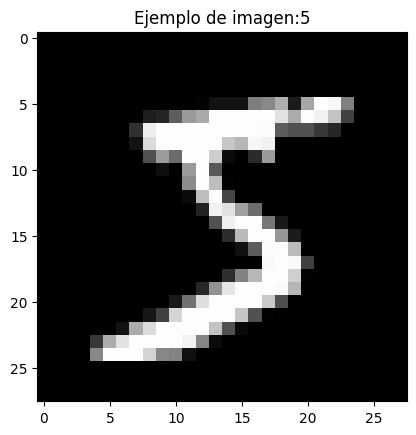

In [ ]:
#Cargar el conjunto de datos MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Normalizar los datos (valores entre 0 y 1)
X_train = X_train.astype('float32') / 255
x_test = X_test.astype('float32') / 255

#Visualizar un ejemplo de los datos
plt.imshow(X_train[0], cmap='gray')
plt.title(f'Ejemplo de imagen:{y_train[0]}')
plt.show()

#Convertir las etiquetas a formato "one-hot" (10 categorias)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

#*Paso 3: Construir el modelo de perceptrón multicapa**

In [ ]:
#Crear el modelo de perceptrón multicapa
model = Sequential()

#Aplanar las imagenes de 28 x 28 en un vector de 784
model.add(Flatten(input_shape = (28,28)))

#Añadir la primera capa oculta con 128 neuronas y activacion ReLU
model.add(Dense(128, activation = 'relu'))

#Añadir la segunda capa oculta con 64 neuronas y activacion ReLu
model.add(Dense(64, activation = 'relu'))

#Añadir la capa de salida con 10 neuronas (1 por clase) y activacion softmax
model.add(Dense(10, activation = 'softmax'))

#Compilar el modelo con optimizador Adam y función de pérdida categórica
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#**Paso 4: Entrenar el modelo**

In [ ]:
#Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2428 - accuracy: 0.9288 - val_loss: 20.9861 - val_accuracy: 0.9565
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1042 - accuracy: 0.9677 - val_loss: 17.2795 - val_accuracy: 0.9659
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0725 - accuracy: 0.9775 - val_loss: 17.7985 - val_accuracy: 0.9676
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0543 - accuracy: 0.9826 - val_loss: 16.1738 - val_accuracy: 0.9733
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0435 - accuracy: 0.9859 - val_loss: 15.6948 - val_accuracy: 0.9763
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0361 - accuracy: 0.9882 - val_loss: 17.3291 - val_accuracy: 0.9761
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0292 - accuracy: 0.9902 - val_loss: 18.5246 - val_ac

#**Paso 5: Evaluar el modelo**

In [ ]:
#Evaluar el modelo en los datos de pruebas
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_accuracy: .4f}')

313/313 [==============================] - 1s 2ms/step - loss: 21.6218 - accuracy: 0.9775
Precisión en el conjunto de prueba:  0.9775


#**Paso 6: Visualizar los resultados**

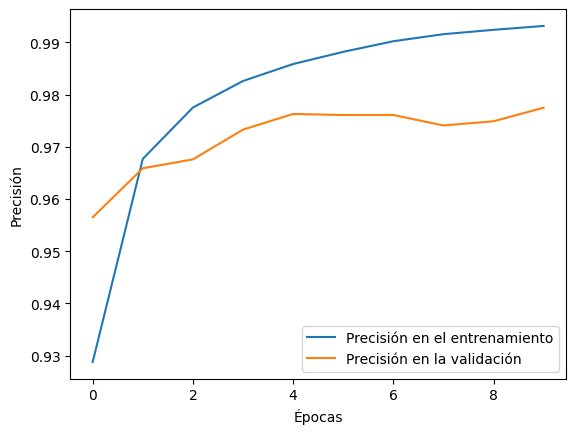

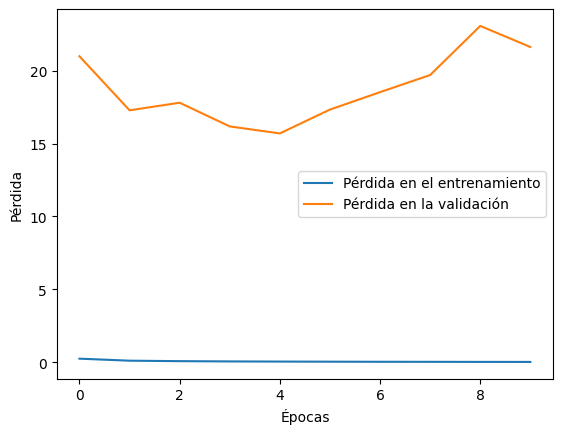

In [ ]:
#Graficar la precisión en entrenamiento y validación
plt.plot(history.history['accuracy'], label = 'Precisión en el entrenamiento')
plt.plot(history.history['val_accuracy'], label= 'Precisión en la validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

#Graficar la pérdida en entrenamiento y validación
plt.plot(history.history['loss'], label = 'Pérdida en el entrenamiento')
plt.plot(history.history['val_loss'], label = 'Pérdida en la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()